# Student Performance - Processing
Dataset of students performance in exams.

Processing the average score of each student

Kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [103]:
#Importing dataset file
data_students = pd.read_csv('./data/students.csv')

In [53]:
#Exploring dataset
data_students.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'average score'],
      dtype='object')

In [54]:
data_students.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,average score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333
5,female,group B,associate's degree,standard,none,77.333333
6,female,group B,some college,standard,completed,91.666667
7,male,group B,some college,free/reduced,none,40.666667
8,male,group D,high school,free/reduced,completed,65.000000
9,female,group B,high school,free/reduced,none,49.333333


### Exploring dataset

(array([  1.,   5.,  12.,  40., 124., 178., 262., 210., 122.,  46.]),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]),
 <BarContainer object of 10 artists>)

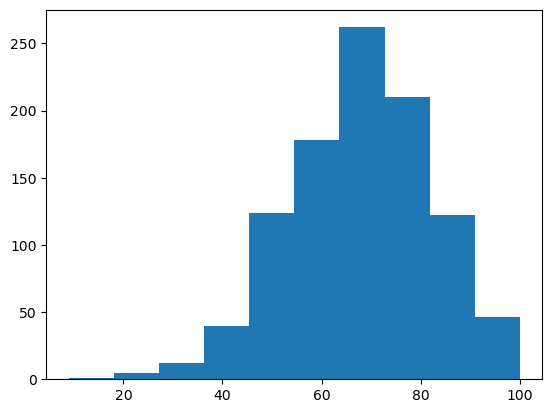

In [56]:
#Approximate math score
plt.hist(x = data_students['average score'])

In [57]:
graphic = px.treemap(data_students, path = ['gender', 'parental level of education', 'race/ethnicity'])
graphic.show()

### Handling inconsistent values

In [58]:
# All columns have been checked
data_students.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
average score                  0
dtype: int64

### Predictor division and class

In [104]:
#Separing predictors and ignoring math score, reading score and writing score columns
X_students = data_students.iloc[:, 0:5].values

In [96]:
X_students

array([['female', 'group B', "bachelor's degree", 'standard', 'none'],
       ['female', 'group C', 'some college', 'standard', 'completed'],
       ['female', 'group B', "master's degree", 'standard', 'none'],
       ...,
       ['female', 'group C', 'high school', 'free/reduced', 'completed'],
       ['female', 'group D', 'some college', 'standard', 'completed'],
       ['female', 'group D', 'some college', 'free/reduced', 'none']],
      dtype=object)

In [105]:
# Average score is the target class
Y_students = data_students.iloc[:, 5].values

In [98]:
Y_students

array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

### Treatment of categorical attributes

#### Label Encoder

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder_gender = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_parental_level_education = LabelEncoder()
label_encoder_lunch = LabelEncoder()
label_encoder_test_preparation_course = LabelEncoder()

In [41]:
X_students[:, 0] = label_encoder_gender.fit_transform(X_students[:, 0])
X_students[:, 1] = label_encoder_race.fit_transform(X_students[:, 1])
X_students[:, 2] = label_encoder_parental_level_education.fit_transform(X_students[:, 2])
X_students[:, 3] = label_encoder_lunch.fit_transform(X_students[:, 3])
X_students[:, 4] = label_encoder_test_preparation_course.fit_transform(X_students[:, 4])

In [14]:
X_students

array([['female', 'group B', "bachelor's degree", 'standard', 'none'],
       ['female', 'group C', 'some college', 'standard', 'completed'],
       ['female', 'group B', "master's degree", 'standard', 'none'],
       ...,
       ['female', 'group C', 'high school', 'free/reduced', 'completed'],
       ['female', 'group D', 'some college', 'standard', 'completed'],
       ['female', 'group D', 'some college', 'free/reduced', 'none']],
      dtype=object)

#### OneHot Encoder (recommended / best results)

In [74]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [106]:
# Transforming categorical variables in dummy variables
onehotencoder_students = ColumnTransformer(transformers = [('OneHot', OneHotEncoder(), [0, 1, 2, 3, 4])])
X_students = onehotencoder_students.fit_transform(data_students.iloc[:, 0:5])




In [108]:
X_students

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

### Dividing the training and testing bases

Separating 15% of the base for testing

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_students_train, X_students_test, Y_students_train, Y_students_test = train_test_split(X_students, Y_students, test_size = 0.15, random_state = 0)

In [81]:
X_students_train.shape, Y_students_train.shape

((850, 17), (850,))

In [82]:
X_students_test.shape, Y_students.shape

((150, 17), (1000,))

### Saving processed variables

In [83]:
import pickle

with open('students_performance.pkl', mode = 'wb') as f:
    pickle.dump((X_students_train, Y_students_train, X_students_test, Y_students_test), f)